In [48]:
# Create or activate the virtual environment and install dependencies
import os

# Suppress output using redirect
def silent_install(cmd):
    os.system(f"{cmd} > /dev/null 2>&1")

# Create the virtual environment if it doesn't exist
if not os.path.exists("env"):
    silent_install("python -m venv env")

# Activate the virtual environment and install requirements
silent_install("env/bin/python -m pip install --upgrade pip")
silent_install("env/bin/python -m pip install yfinance seaborn pandas_datareader")

In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# For time stamps
from datetime import datetime

In [50]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price      Adj Close Close High  Low Open Volume company_name Adj Close Close  \
Ticker          AAPL  AAPL AAPL AAPL AAPL   AAPL                   GOOG  GOOG   
Date                                                                            
2024-11-19       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-11-20       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-11-21       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-11-22       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-11-25       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-11-26       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-11-27       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-11-29       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-02       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-03       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   

Price      High  ...       Low Open Volume   Adj Close       Close  \
Ticker     GOOG  ... MSFT MSFT MSFT   MSFT        AMZN        AMZN   
Date             ...                                                 
2024-11-19  NaN  ...  NaN  NaN  NaN    NaN  204.610001  204.610001   
2024-11-20  NaN  ...  NaN  NaN  NaN    NaN  202.880005  202.880005   
2024-11-21  NaN  ...  NaN  NaN  NaN    NaN  198.380005  198.380005   
2024-11-22  NaN  ...  NaN  NaN  NaN    NaN  197.119995  197.119995   
2024-11-25  NaN  ...  NaN  NaN  NaN    NaN  201.449997  201.449997   
2024-11-26  NaN  ...  NaN  NaN  NaN    NaN  207.860001  207.860001   
2024-11-27  NaN  ...  NaN  NaN  NaN    NaN  205.740005  205.740005   
2024-11-29  NaN  ...  NaN  NaN  NaN    NaN  207.889999  207.889999   
2024-12-02  NaN  ...  NaN  NaN  NaN    NaN  210.710007  210.710007   
2024-12-03  NaN  ...  NaN  NaN  NaN    NaN  212.730103  212.730103   

Price             High         Low        Open      Volume  
Ticker            AMZN        AMZN        AMZN        AMZN  
Date                                                        
2024-11-19  205.300003  198.779999  199.330002  31197900.0  
2024-11-20  203.130005  199.449997  202.979996  32769000.0  
2024-11-21  203.490005  195.750000  203.490005  58800000.0  
2024-11-22  199.259995  196.750000  198.250000  31530800.0  
2024-11-25  201.949997  199.000000  199.279999  40685700.0  
2024-11-26  208.000000  201.789993  201.899994  41673700.0  
2024-11-27  207.639999  205.050003  206.979996  28061600.0  
2024-11-29  208.199997  204.589996  205.830002  24892400.0  
2024-12-02  212.990005  209.509995  209.960007  39478000.0  
2024-12-03  213.300003  209.649994  210.309998  13989791.0  

[10 rows x 25 columns]

In [51]:
# Summary Stats
AAPL.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,202.493235,203.000555,204.664345,201.090478,202.809881,5.751572e+07
std,22.623280,22.436397,22.567379,22.072939,22.336419,3.054633e+07
min,164.405121,165.000000,166.399994,164.080002,165.350006,1.627528e+07
25%,183.452488,184.224998,185.134995,182.204998,183.827499,4.213035e+07
50%,196.213066,196.915001,197.489998,194.840004,196.130005,5.028685e+07
75%,225.195492,225.257496,226.924999,223.250000,224.992504,6.445522e+07
max,241.509995,241.509995,241.634995,238.900299,239.919998,3.186799e+08


In [52]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-12-04 to 2024-12-03
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  252 non-null    float64
 1   (Close, AAPL)      252 non-null    float64
 2   (High, AAPL)       252 non-null    float64
 3   (Low, AAPL)        252 non-null    float64
 4   (Open, AAPL)       252 non-null    float64
 5   (Volume, AAPL)     252 non-null    int64  
 6   (company_name, )   252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


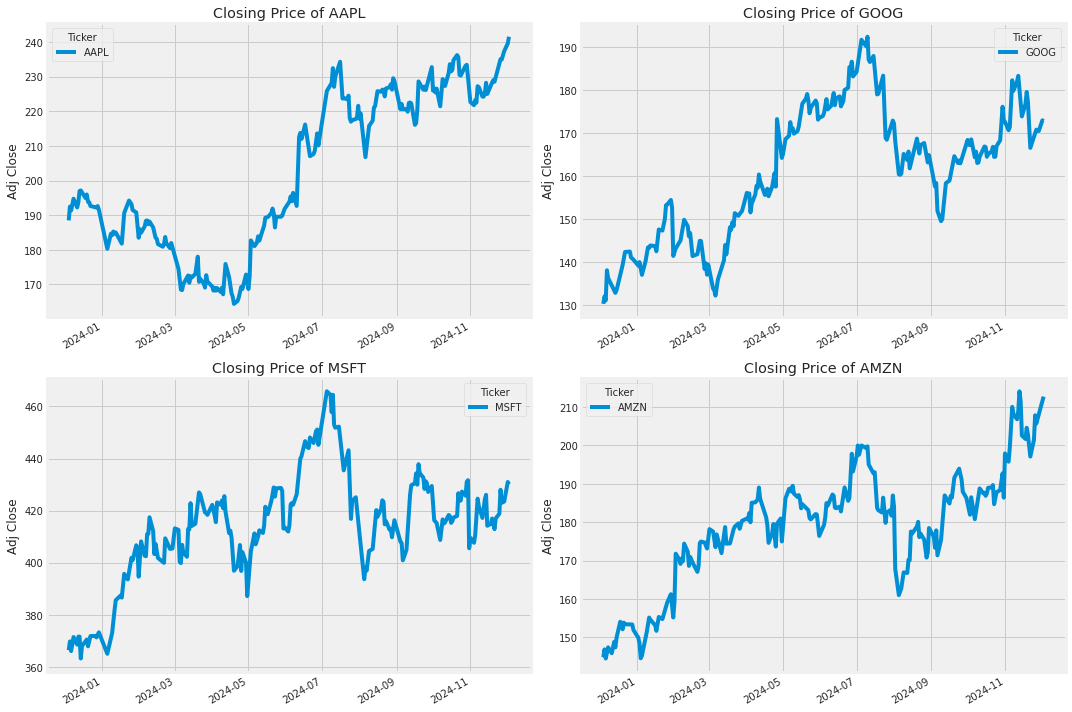

In [59]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

num_companies = len(company_list)
axes = []

# Plot only valid companies
for i, company in enumerate(company_list, 1):
    ax = plt.subplot(2, 2, i)
    company['Adj Close'].plot(ax=ax)
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    axes.append(ax)

# Remove unused subplots
for j in range(len(company_list) + 1, 5):  # Subplots from num_companies+1 to 4
    plt.delaxes(plt.subplot(2, 2, j))

plt.tight_layout()
plt.show()

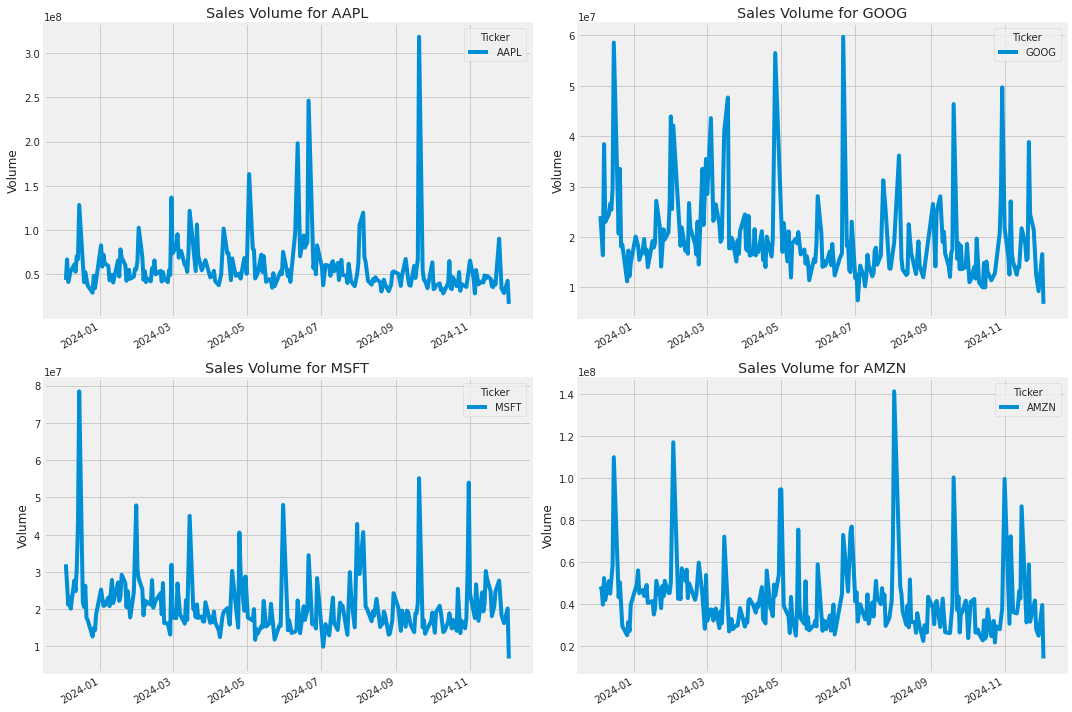

In [60]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

num_companies = len(company_list)
axes = []

# Plot only valid companies
for i, company in enumerate(company_list, 1):
    ax = plt.subplot(2, 2, i)
    company['Volume'].plot(ax=ax)
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    axes.append(ax)

# Remove unused subplots
for j in range(len(company_list) + 1, 5):  # Subplots from num_companies+1 to 4
    plt.delaxes(plt.subplot(2, 2, j))

plt.tight_layout()
plt.show()

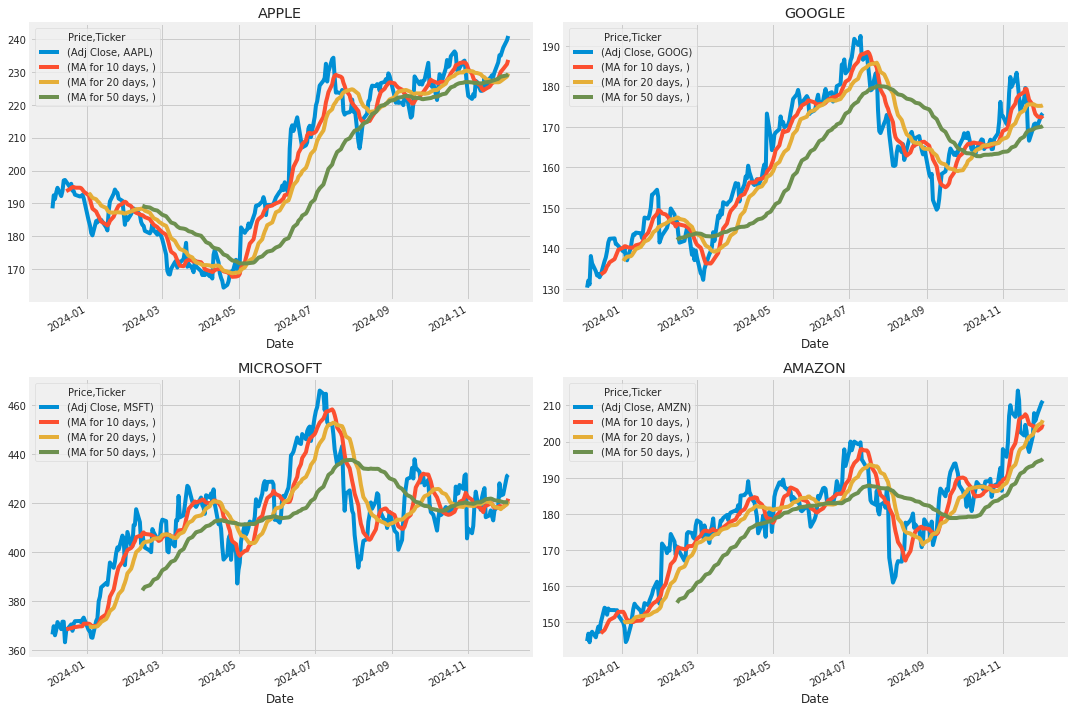

In [17]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

[*********************100%***********************]  1 of 1 completed
<ipython-input-45-8c338be93466>:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust layout to fit the rotated labels


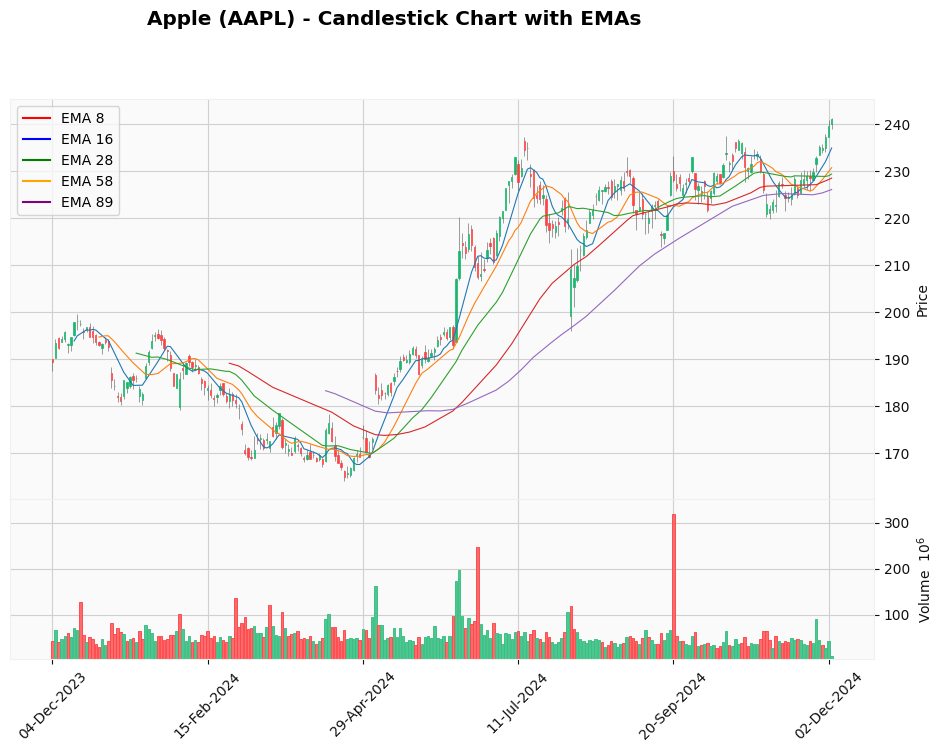

In [45]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import mplfinance as mpf
import matplotlib.pyplot as plt

# Define stock and time range
stock = "AAPL"
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download data
AAPL = yf.download(stock, start, end)

# Flatten the column index if multi-level
AAPL.columns = [col[0] if isinstance(col, tuple) else col for col in AAPL.columns]

# Calculate Exponential Moving Averages (EMAs)
ema_days = [8, 16, 28, 58, 89]
for ema in ema_days:
    AAPL[f"EMA_{ema}"] = AAPL['Adj Close'].ewm(span=ema, adjust=False).mean()

# Select relevant columns for plotting
plot_data = AAPL[['Open', 'High', 'Low', 'Close', 'Volume'] + [f"EMA_{ema}" for ema in ema_days]].dropna()

# Convert columns to numeric (just in case)
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
plot_data[numeric_columns] = plot_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Plot the candlestick chart
fig, axlist = mpf.plot(
    plot_data,
    type='candle',  # Candlestick chart
    mav=ema_days,  # Add EMAs
    volume=True,  # Include volume bars
    title=f"Apple (AAPL) - Candlestick Chart with EMAs",
    style='yahoo',  # Predefined style
    figsize=(12, 8),
    returnfig=True  # Return figure for further customization
)

# Customize the x-axis to show only 6 evenly spaced dates
ax = axlist[0]  # Main chart axis
xticks_positions = list(range(0, len(plot_data.index), len(plot_data.index) // 5))  # 5 intervals = 6 labels
xticks_labels = [plot_data.index[i].strftime("%d-%b-%Y") for i in xticks_positions]

ax.set_xticks(xticks_positions)
ax.set_xticklabels(xticks_labels, rotation=45, ha='right')

# Add the legend manually using matplotlib
legend_handles = [
    plt.Line2D([], [], color=color, label=f"EMA {ema}")
    for color, ema in zip(['red', 'blue', 'green', 'orange', 'purple'], ema_days)
]
ax.legend(handles=legend_handles, loc="best")

plt.tight_layout()  # Adjust layout to fit the rotated labels
plt.show()